In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [4]:
df = pd.read_csv('/Users/ritaguan/Desktop/nb_py.csv')

(array([27.,  0.,  0.,  0.,  0., 25.,  0.,  0.,  0., 18.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

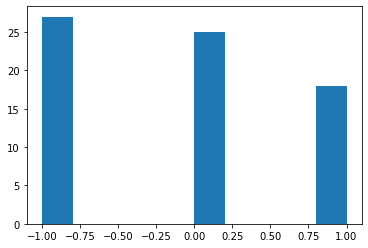

In [13]:
# Class Distribution
plt.hist(df['label'])

In [5]:
#tfidf, train test data split
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words='english')
processed_features = vectorizer.fit_transform(df['lemmas_back_to_text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(processed_features, df['label'], test_size=0.2)

CLASSIFICATION REPPORT:                precision    recall  f1-score   support

          -1       0.67      1.00      0.80         6
           0       1.00      0.83      0.91         6
           1       0.00      0.00      0.00         2

    accuracy                           0.79        14
   macro avg       0.56      0.61      0.57        14
weighted avg       0.71      0.79      0.73        14



/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


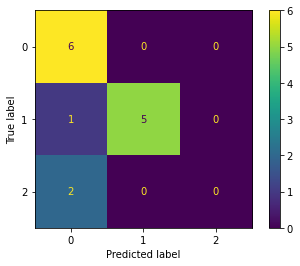

In [8]:
# Random Baseline Classifier
baseline_predict = LinearSVC(dual=False).fit(X_train,y_train).predict(X_test) 
print("CLASSIFICATION REPPORT: ", classification_report(y_test,baseline_predict))
cm = confusion_matrix(y_test, baseline_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [4]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)



In [5]:
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)

In [6]:
def confusion_plot(y_data, y_pred):
    cm = confusion_matrix(y_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()
    print("ACCURACY: ", accuracy_score(y_data, y_pred) )
    print("CLASSIFICATION REPPORT: ", classification_report(y_data,y_pred))
    print(confusion_matrix(y_data, y_pred))
    plt.show()

------TRAINING------
ACCURACY:  0.6785714285714286
CLASSIFICATION REPPORT:                precision    recall  f1-score   support

          -1       0.54      1.00      0.70        21
           0       1.00      0.55      0.71        22
           1       1.00      0.38      0.56        13

    accuracy                           0.68        56
   macro avg       0.85      0.64      0.65        56
weighted avg       0.83      0.68      0.67        56

[[21  0  0]
 [10 12  0]
 [ 8  0  5]]


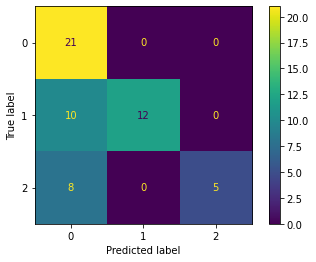

------TEST------
ACCURACY:  0.5714285714285714
CLASSIFICATION REPPORT:                precision    recall  f1-score   support

          -1       0.50      0.83      0.62         6
           0       1.00      0.67      0.80         3
           1       0.50      0.20      0.29         5

    accuracy                           0.57        14
   macro avg       0.67      0.57      0.57        14
weighted avg       0.61      0.57      0.54        14

[[5 0 1]
 [1 2 0]
 [4 0 1]]


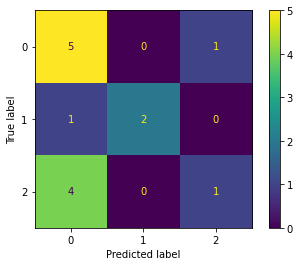

In [7]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)


In [8]:
def plot_tree(model):
      fig = plt.figure(figsize=(25,20))
      _ = tree.plot_tree(model, 

                   filled=True)

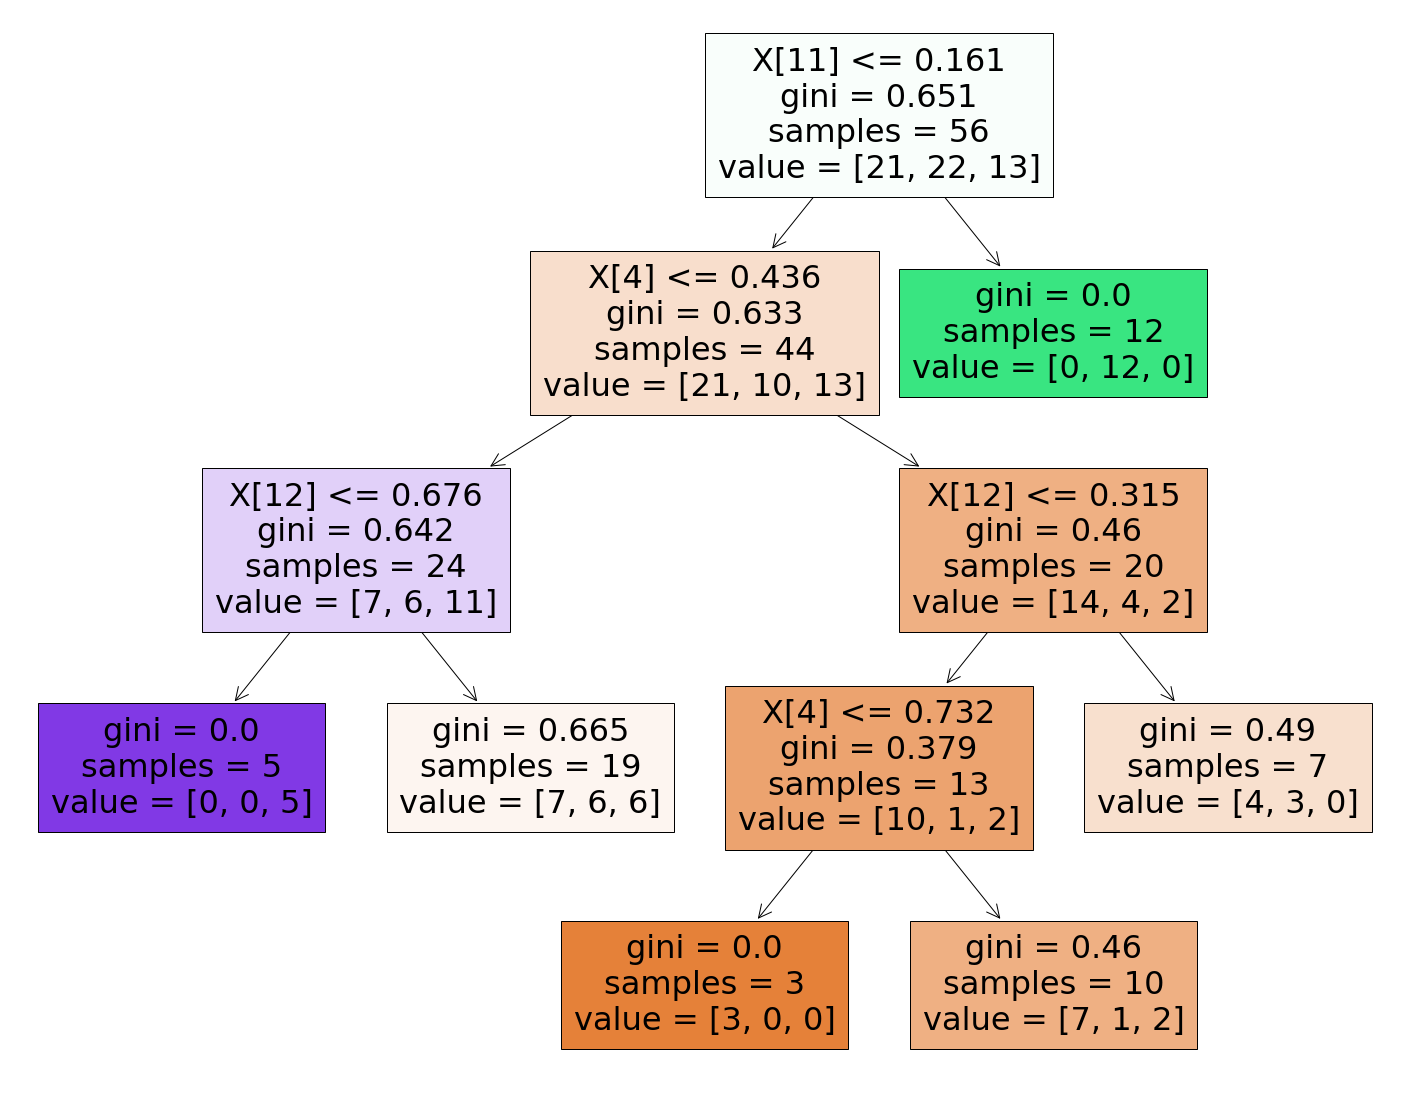

In [9]:
plot_tree(model)